In [237]:
import sqlite3
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [143]:
con = sqlite3.connect("/home/dominik/Projekte/Code/LuftdatenMesser_21-01-30/SQL-Datenbank-Backup/sensorDaten.db")
cur = con.cursor()

In [328]:
sensordaten = pd.read_sql('SELECT * FROM sensordaten WHERE pm2_5 NOT NULL', con)
# one_day = pd.read_sql('SELECT * FROM sensordaten WHERE pm2_5 NOT NULL AND day="07.03.21";', con)
sensordaten["day_and_time"] = sensordaten["day"]+"\n"+sensordaten["time"]



Length of sensordaten = 1417<br>
Messured days = 5 (from 04.03 - 09.03)<br>
xticks = 1417 / 5 <br>
== 283


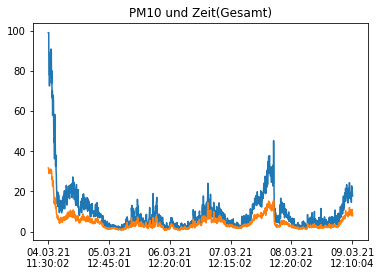

In [355]:
fig, ax = plt.subplots()
ax.plot(sensordaten.day_and_time,sensordaten.pm10)
ax.plot(sensordaten.day_and_time,sensordaten.pm2_5)

ax.set_title('PM10 und Zeit(Gesamt)')
ax.set_xticks(ax.get_xticks()[::283])
plt.show()


In [394]:
one_day = sensordaten["day"] == "07.03.21"
one_day = sensordaten[one_day]

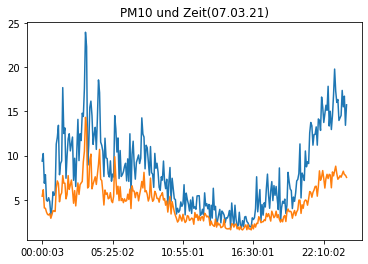

In [395]:
fig, ax = plt.subplots()
ax.plot(one_day.time,one_day.pm10)
ax.plot(one_day.time,one_day.pm2_5)
# ax.plot(one_day.time,one_day.humidity)
# ax.plot(one_day.time,one_day.temperature)
ax.set_title('PM10 und Zeit(07.03.21)')
ax.set_xticks(ax.get_xticks()[::65])
plt.show()

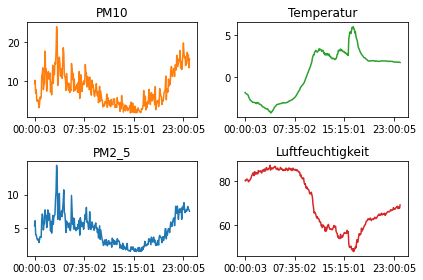

In [396]:
fig, axs = plt.subplots(2, 2)

axs[0, 0].plot(one_day.time,one_day.pm10,'tab:orange')
axs[0, 0].set_title("PM10")
axs[1, 0].plot(one_day.time, one_day.pm2_5)
axs[1, 0].set_title("PM2_5")
axs[1, 0].sharex(axs[0, 0])
axs[0, 1].plot(one_day.time, one_day.temperature,'tab:green')
axs[0, 1].set_title("Temperatur")
axs[1, 1].plot(one_day.time, one_day.humidity,'tab:red')
axs[1, 1].set_title("Luftfeuchtigkeit")

axs[0, 1].set_xticks(axs[0, 0].get_xticks()[::90])
axs[1, 1].set_xticks(axs[0, 0].get_xticks()[::90])
axs[0, 0].set_xticks(axs[0, 0].get_xticks()[::90])


fig.tight_layout()